## Imports

In [1]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

Contains list of items in each transactions

In [2]:
df = pd.read_csv('./dataset/basket.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.shape

(14963, 11)

### Cleaning null values

Lets drop the null fields and retrieve the items in each transaction into nested list

In [3]:
data = df.T.apply(lambda x: x.dropna().tolist()).tolist()
data

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread'],
 ['butter', 'whole milk'],
 ['frozen vegetables', 'other vegetables'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['sausage', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['root vegetables', 'whole milk', 'pastry'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['other vegetables', 'hygiene

## Transaction Encoding

Transforms the dataset into a logical data frame. Each column represents an item and each row represent a record or a transaction for one purchase.

*TRUE* if the transaction occurs *FALSE* if not.

In [5]:
from mlxtend.preprocessing import TransactionEncoder

In [8]:
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
transactions = pd.DataFrame(te_ary, columns=te.columns_)

In [9]:
transactions.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
transactions.columns

Index(['Instant food products', 'UHT-milk', 'abrasive cleaner',
       'artif. sweetener', 'baby cosmetics', 'bags', 'baking powder',
       'bathroom cleaner', 'beef', 'berries',
       ...
       'turkey', 'vinegar', 'waffles', 'whipped/sour cream', 'whisky',
       'white bread', 'white wine', 'whole milk', 'yogurt', 'zwieback'],
      dtype='object', length=167)

### Most popular items

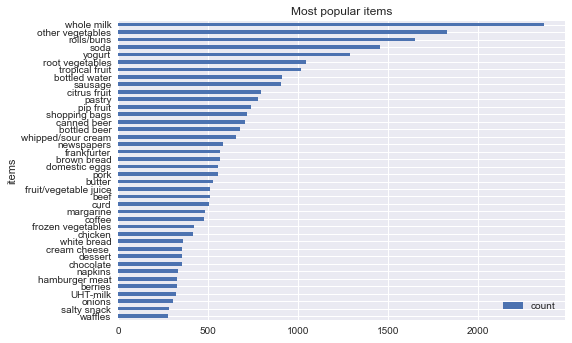

In [36]:
import matplotlib 

#most popular items
count = transactions.loc[:,:].sum()
pop_item = count.sort_values(0, ascending = False).head(40)
pop_item = pop_item.to_frame()
pop_item = pop_item.reset_index()
pop_item = pop_item.rename(columns = {"index": "items",0: "count"})
#Data Visualization
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
matplotlib.style.use('seaborn')
ax = pop_item.plot.barh(x = 'items', y = 'count')
plt.title('Most popular items')
plt.gca().invert_yaxis()

In [14]:
frequent_items = apriori(transactions, min_support=0.001, use_colnames=True, verbose=1)
frequent_items.head()

Processing 28 combinations | Sampling itemset size 4e 3


,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)


In [15]:
# add column containing number of items
frequent_items['length'] = frequent_items['itemsets'].apply(lambda x: len(x))

In [16]:
freq_items.head()

,support,itemsets,length
0,0.004010,(Instant food products),1
1,0.021386,(UHT-milk),1
2,0.001470,(abrasive cleaner),1
3,0.001938,(artif. sweetener),1
4,0.008087,(baking powder),1


In [17]:
frequent_items.sort_values('length',ascending=False)

,support,itemsets,length
749,0.001470,"(sausage, whole milk, yogurt)",3
745,0.001136,"(sausage, rolls/buns, whole milk)",3
742,0.001203,"(rolls/buns, whole milk, other vegetables)",3
743,0.001136,"(soda, whole milk, other vegetables)",3
744,0.001136,"(whole milk, yogurt, other vegetables)",3
...,...,...,...
100,0.007819,(pot plants),1
99,0.037091,(pork),1
98,0.003208,(popcorn),1
97,0.049054,(pip fruit),1


In [18]:
rules = association_rules(
    frequent_items,
    metric="confidence",
    min_threshold=0.001
)

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168
1,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755
2,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060
3,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443
4,(rolls/buns),(UHT-milk),0.110005,0.021386,0.001804,0.016403,0.767013,-0.000548,0.994934


In [19]:
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1233,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
1208,"(sausage, rolls/buns)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304
1226,"(soda, sausage)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,0.000130,1.026642
1108,(semi-finished bread),(whole milk),0.009490,0.157923,0.001671,0.176056,1.114825,0.000172,1.022008
1221,"(rolls/buns, yogurt)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,0.000102,1.015701
...,...,...,...,...,...,...,...,...,...
959,(whole milk),(pasta),0.157923,0.008087,0.001069,0.006771,0.837316,-0.000208,0.998675
654,(whole milk),(frozen fish),0.157923,0.006817,0.001069,0.006771,0.993287,-0.000007,0.999954
982,(whole milk),(pickled vegetables),0.157923,0.008955,0.001002,0.006348,0.708829,-0.000412,0.997376
1219,(whole milk),"(soda, rolls/buns)",0.157923,0.008087,0.001002,0.006348,0.784984,-0.000275,0.998250


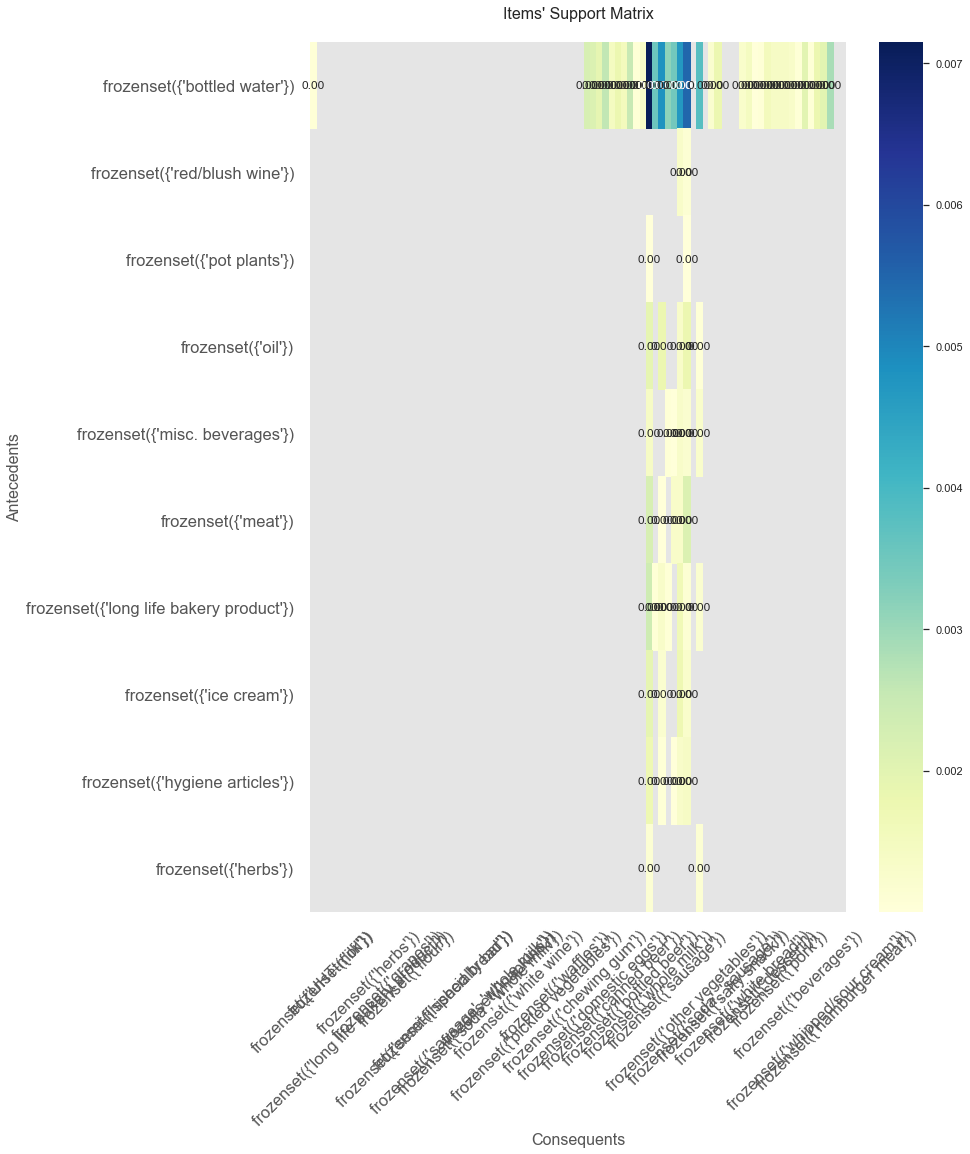

In [38]:
# plot a heatmap to know how strong the association is based on lift values
pivot_support = rules.pivot(index='antecedents', columns='consequents', values='support').head(10)

sns.set_context("talk")
plt.style.use('ggplot')
plt.subplots(figsize=(12, 16))
sns.set()
ax = sns.heatmap(data=pivot_support, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title("Items' Support Matrix", fontsize=16, y=1.02)
ax.set_xlabel("Consequents",fontsize=16)
ax.set_ylabel("Antecedents",fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show() 